In [2]:
#Imports 
import tensorflow as tf
import pandas as pd
import numpy as np

from sklearn.preprocessing import OneHotEncoder

import seaborn as sns
import matplotlib.pyplot as plt

2024-04-13 12:36:02.662145: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-04-13 12:36:03.484395: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [3]:
from datetime import datetime
def convert_to_timestamp(test_date_str):
  """
  Converts a date string in 'Nov-2020' format to a timestamp.

  Args:
      test_date_str: The date string to convert (e.g., 'Nov-2020').

  Returns:
      A datetime object representing the timestamp.
  """
  # Define the format string matching month abbreviation and year
  date_format = "%b-%Y"

  try:
    # Parse the date string using the format
    datetime_obj = datetime.strptime(test_date_str, date_format)
  except ValueError:
    # Handle potential errors like invalid format or month abbreviation
    return None  # Or handle differently as needed (e.g., raise exception)

  # Return the datetime object as a timestamp (assuming you want Unix timestamp)
  return datetime_obj.timestamp()

def get_months_since_jan_2010(timestamp):
  """
  Calculates the number of months since January 1st, 2010, given a timestamp.

  Args:
      timestamp: The timestamp (seconds since Unix epoch).

  Returns:
      The number of months since January 1st, 2010, or None if timestamp is invalid.
  """
  if not timestamp:
      return None  # Handle potential invalid timestamps from convert_to_timestamp

  # Define reference date as January 1st, 2010
  reference_date = datetime(year=2010, month=1, day=1)

  # Convert timestamp to datetime object
  datetime_obj = datetime.fromtimestamp(timestamp)

  # Calculate the difference in years and months
  years_diff = datetime_obj.year - reference_date.year
  months_diff = datetime_obj.month - reference_date.month

  # Account for months in the previous year if current month is less than reference month
  if months_diff < 0:
    years_diff -= 1
    months_diff += 12

  # Total number of months since reference date
  total_months = years_diff * 12 + months_diff

  return total_months

In [4]:
# Load the spreadsheet
data = pd.read_csv("rfp2017-results-20240324-173734.csv")
# Get rid of all the newline escape characters
data = data.rename(columns=lambda x: x.replace('\n', ''), inplace=False)
column_names = data.columns.tolist()

In [ ]:
# Build pair plots
# Define a function to create the pairplot for each subset of features
def plot_correlations(feature_subsets):
    sns.pairplot(feature_subsets)
    plt.show()  # Display the pairplot

# Define a list of feature subsets (adjust based on your needs)
feature_subsets = data.select_dtypes(include=[np.number])
#feature_subsets = feature_subsets.drop('Column name to drop', axis=1)
feature_subsets = feature_subsets[list(feature_subsets.columns)[:7]]

foo = feature_subsets.columns.tolist()

# Call the function to generate pairplots for each subset
plot_correlations(feature_subsets)  # Copy the dataframe to avoid modifications

In [5]:
# Clean the data

# Filter down to certain configurations
#features = data[data['Baseline'] > 0 ]
features = data[data['Result'] > 0 ]

# Get around the copy warning
fc = features.copy()

# Drop certain rows based on column values
features = features[~features['Processor'].str.contains('SPARC')]
#features = features[~features['Processor'].str.contains('Intel')]
#features = features[~features['Processor'].str.contains('AMD')]
#features = features[~features['Processor'].str.contains('Ampere')]

# Drop non-numeric columns
features = fc.select_dtypes(include=[np.number])

# Define a list of feature subsets (adjust based on your needs)
features = features[list(features.columns)[:7]]

#features = features.drop('License', axis=1)
features = features.drop('Baseline', axis=1)
#features = features.drop('Result', axis=1)

# Encode the Test Date as the number of months since Jan-2010
#fc['Datetime'] = pd.to_datetime(fc['Test Date'], format='%b-%Y', errors='coerce')
#features['Months Since Jan 2010'] = fc['Datetime'].apply(get_months_since_jan_2010)
features['Months Since Jan 2010'] = fc['Test Date'].apply(convert_to_timestamp).apply(get_months_since_jan_2010)

# Add features including categorical variables
#features = pd.concat([features, fc['3rd Level Cache']], axis=1)
features = pd.concat([features, fc['CPU(s) Orderable'].astype(str)], axis=1)
# Clean up CPU(s) orderable
# A better way might be to express these as a range or one hot encode 1 2 3 4 etc.
# Also, need to compare to a model without this field
features['CPU(s) Orderable'] = features['CPU(s) Orderable'].str.replace('1 CPU chip; 2, 3, 4, .. 6 cores', '1 chip')
features['CPU(s) Orderable'] = features['CPU(s) Orderable'].str.replace('1 Chips', '1 chip')
features['CPU(s) Orderable'] = features['CPU(s) Orderable'].str.replace('1 xhip', '1 chip')
features['CPU(s) Orderable'] = features['CPU(s) Orderable'].str.replace('1 Chip', '1 chip')
features['CPU(s) Orderable'] = features['CPU(s) Orderable'].str.replace('1 chips', '1 chip')
features['CPU(s) Orderable'] = features['CPU(s) Orderable'].str.replace('1-2 chips', '1,2 chips')
features['CPU(s) Orderable'] = features['CPU(s) Orderable'].str.replace('1.2 chips', '1,2 chips')
features['CPU(s) Orderable'] = features['CPU(s) Orderable'].str.replace('1, 2 chip(s)', '1,2 chips')
features['CPU(s) Orderable'] = features['CPU(s) Orderable'].str.replace('1,2 (chip)s', '1,2 chips')
features['CPU(s) Orderable'] = features['CPU(s) Orderable'].str.replace('1,2 Chips', '1,2 chips')
features['CPU(s) Orderable'] = features['CPU(s) Orderable'].str.replace('1,2 chip', '1,2 chips')
features['CPU(s) Orderable'] = features['CPU(s) Orderable'].str.replace('1,2 chip(s)', '1,2 chips')
features['CPU(s) Orderable'] = features['CPU(s) Orderable'].str.replace('1, 2', '1,2 chips')
features['CPU(s) Orderable'] = features['CPU(s) Orderable'].str.replace('1, 2 (chip)s', '1,2 chips')
features['CPU(s) Orderable'] = features['CPU(s) Orderable'].str.replace('1,2 chips (chip)s', '1,2 chips')
features['CPU(s) Orderable'] = features['CPU(s) Orderable'].str.replace('1,2 chips chips', '1,2 chips')
features['CPU(s) Orderable'] = features['CPU(s) Orderable'].str.replace('1,2 chips(s)', '1,2 chips')
features['CPU(s) Orderable'] = features['CPU(s) Orderable'].str.replace('1,2 chipss', '1,2 chips')
features['CPU(s) Orderable'] = features['CPU(s) Orderable'].str.replace('1, 2, 4 chip(s)', '1,2,4 chips')
features['CPU(s) Orderable'] = features['CPU(s) Orderable'].str.replace('1,2 chips, 4 chip(s)', '1,2,4 chips')
features['CPU(s) Orderable'] = features['CPU(s) Orderable'].str.replace('1,2,4 (chip)s', '1,2,4 chips')
features['CPU(s) Orderable'] = features['CPU(s) Orderable'].str.replace('1,2,3,4 Chips', '1,2,3,4 chips')
features['CPU(s) Orderable'] = features['CPU(s) Orderable'].str.replace('1,2,3,4 chip', '1,2,3,4 chips')
features['CPU(s) Orderable'] = features['CPU(s) Orderable'].str.replace('1,2,3,4 chipss', '1,2,3,4 chips')
features['CPU(s) Orderable'] = features['CPU(s) Orderable'].str.replace('2,4 chip', '2,4 chips')
features['CPU(s) Orderable'] = features['CPU(s) Orderable'].str.replace('4, 8, 16 chip(s)', '4,8,16 chips')
features['CPU(s) Orderable'] = features['CPU(s) Orderable'].str.replace('1 chip(s)', '1 chip')
features['CPU(s) Orderable'] = features['CPU(s) Orderable'].str.replace('1,2 chips chip (s)', '1,2 chips')
features['CPU(s) Orderable'] = features['CPU(s) Orderable'].str.replace('1,2,4 chips (s)', '1,2,4 chips')
features['CPU(s) Orderable'] = features['CPU(s) Orderable'].str.replace('1,2 chips, 3, 4 chip(s)', '1,2,3,4 chips')
features['CPU(s) Orderable'] = features['CPU(s) Orderable'].str.replace('2, 4, 8 chip(s)', '2,4,8 chips')
features['CPU(s) Orderable'] = features['CPU(s) Orderable'].str.replace('2, 4 chip(s)', '2,4 chips')
features['CPU(s) Orderable'] = features['CPU(s) Orderable'].str.replace('2 chip', '2 chips')
features['CPU(s) Orderable'] = features['CPU(s) Orderable'].str.replace('2,4,6,8 Chips', '2,4,6,8 chips')
features['CPU(s) Orderable'] = features['CPU(s) Orderable'].str.replace('2, 4', '2,4 chips')
features['CPU(s) Orderable'] = features['CPU(s) Orderable'].str.replace('2 or 4 chips', '2,4 chips')
features['CPU(s) Orderable'] = features['CPU(s) Orderable'].str.replace('2, 4 chips', '2,4 chips')
features['CPU(s) Orderable'] = features['CPU(s) Orderable'].str.replace('2,4,6,8 chip', '2,4,6,8 chips')
features['CPU(s) Orderable'] = features['CPU(s) Orderable'].str.replace('1,2,4 chipss', '1,2,4 chips')
features['CPU(s) Orderable'] = features['CPU(s) Orderable'].str.replace('2 chipss', '2 chips')
features['CPU(s) Orderable'] = features['CPU(s) Orderable'].str.replace('2,4 Chips', '2,4 chips')
features['CPU(s) Orderable'] = features['CPU(s) Orderable'].str.replace('1,2 chipss', '1,2 chips')
features['CPU(s) Orderable'] = features['CPU(s) Orderable'].str.replace('2,4 chips chips', '2,4 chips')
features['CPU(s) Orderable'] = features['CPU(s) Orderable'].str.replace('2,4 chipss', '2,4 chips')
features['CPU(s) Orderable'] = features['CPU(s) Orderable'].str.replace('2,4,6,8 chipss', '2,4,6,8 chips')
features['CPU(s) Orderable'] = features['CPU(s) Orderable'].str.replace('2,4,8 Chips', '2,4,8 chips')

#features['CPU(s) Orderable'] = features['CPU(s) Orderable'].str.replace('', '')
#foo = features['CPU(s) Orderable'].unique()
#foo.sort()

#features = pd.concat([features, fc['Operating System']], axis=1)
# One Hot Encoding of Intel processors
features["Is_Intel"] = fc["Processor"].str.contains("Intel", case=False)
features["Is_Intel"] = features["Is_Intel"].astype(int)
# One Hot Encoding of AMD processors
features["Is_AMD"] = fc["Processor"].str.contains("AMD", case=False)
features["Is_AMD"] = features["Is_AMD"].astype(int)
# One Hot Encoding of processor type
features["Is_Core"] = fc["Processor"].str.contains("Core", case=False)
features["Is_Core"] = features["Is_Core"].astype(int)
features["Is_Pentium"] = fc["Processor"].str.contains("Pentium", case=False)
features["Is_Pentium"] = features["Is_Pentium"].astype(int)
features["Is_Xeon"] = fc["Processor"].str.contains("Xeon", case=False)
features["Is_Xeon"] = features["Is_Xeon"].astype(int)
features["Is_EPYC"] = fc["Processor"].str.contains("EPYC", case=False)
features["Is_EPYC"] = features["Is_EPYC"].astype(int)
features["Is_Ampere"] = fc["Processor"].str.contains("Ampere", case=False)
features["Is_Ampere"] = features["Is_Ampere"].astype(int)

# One Hot Encoding of OS name
features["Is_CentOS"] = fc["Operating System"].str.contains("CentOS", case=False)
features["Is_CentOS"] = features["Is_CentOS"].astype(int)
features["Is_Solaris"] = fc["Operating System"].str.contains("Solaris", case=False)
features["Is_Solaris"] = features["Is_Solaris"].astype(int)
features["Is_RedHat"] = fc["Operating System"].str.contains("Red Hat", case=False)
features["Is_RedHat"] = features["Is_RedHat"].astype(int)
features["Is_SUSE"] = fc["Operating System"].str.contains("SUSE", case=False)
features["Is_SUSE"] = features["Is_SUSE"].astype(int)
features["Is_Ubuntu"] = fc["Operating System"].str.contains("Ubuntu", case=False)
features["Is_Ubuntu"] = features["Is_Ubuntu"].astype(int)

# Encode each level of cache as a number
# TODO: Fix this code for 1LC_KB. Some CPUs have assymetric Instruction and Data Cache
features['1LC_KB'] = fc['1st Level Cache'].str.extract('(\d+)').astype(float)
features['2LC_MB'] = fc['2nd Level Cache'].str.extract('(\d+)').astype(float)
# TODO: Some have split cache listed per core; may or may not improve the model
features['3LC_MB'] = fc['3rd Level Cache'].str.extract('(\d+)').astype(float)

# Fix for KB values; this is a bit of a hack; need a better way to dissect the strings
features['2LC_MB'] = features['2LC_MB'].where(features['2LC_MB'] != 512, 0.5)
features['2LC_MB'] = features['2LC_MB'].where(features['2LC_MB'] != 256, 0.25)

feature_list = features.columns.tolist()

features = features[feature_list].dropna()

# Renumber the indices of the data frame
features = features.reset_index(drop=True)

In [6]:
# One-hot encoding of CPU configuration
ohe_name = 'CPU(s) Orderable'
ohe = OneHotEncoder(sparse_output=False)
ohe.fit(pd.DataFrame(features[ohe_name]))
encoded_data = ohe.transform(pd.DataFrame(features[ohe_name]))
ohe_columns = ohe.get_feature_names_out()
ohe_df = pd.DataFrame(encoded_data, columns=ohe_columns)
features = features.drop(ohe_name, axis=1)

In [8]:
# One-hot encoding of another feature
# ohe_name = '3rd Level Cache'
# ohe_tlc = OneHotEncoder(sparse_output=False)
# ohe_tlc.fit(pd.DataFrame(features[ohe_name]))
# encoded_tlc = ohe_tlc.transform(pd.DataFrame(features[ohe_name]))
# ohe_tlc_columns = ohe_tlc.get_feature_names_out()
# ohe_tlc = pd.DataFrame(encoded_tlc, columns=ohe_tlc_columns)

# features = features.drop(ohe_name, axis=1)

In [10]:
# One-hot encoding of Memory Type
# ohe_name = 'Memory Type'
# ohe_mt = OneHotEncoder(sparse_output=False)
# ohe_mt.fit(pd.DataFrame(features[ohe_name]))
# encoded_mt = ohe_mt.transform(pd.DataFrame(features[ohe_name]))
# ohe_mt_columns = ohe_mt.get_feature_names_out()
# ohe_mt = pd.DataFrame(encoded_mt, columns=ohe_mt_columns)

# features = features.drop(ohe_name, axis=1)

In [11]:
# Split the predictors from the performance
# We have the features, merge with the one hot encoded values
fc = features.reset_index()
#ohe_df = ohe_df.reset_index()
#ohe_pv = ohe_pv.reset_index()
#ohe_mt = ohe_mt.reset_index()
#ohe_oem = ohe_oem.reset_index()
#ohe_gt = ohe_gt.reset_index()

#fc = pd.concat([fc, ohe_df, ohe_pv, ohe_mt, ohe_oem, ohe_gt], axis=1)
#fc = pd.concat([fc, ohe_df, ohe_os], axis=1)
#fc = pd.concat([fc, ohe_df], axis=1)
#fc = pd.concat([fc, ohe_df, ohe_tlc], axis=1)
fc = pd.concat([fc, ohe_df], axis=1)
features = fc.copy()
#target = features['Baseline']
target = features['Result']
#features = features.drop('Baseline', axis=1)
features = features.drop('Result', axis=1)
features.dtypes

index                                      int64
# Cores                                    int64
# Chips                                    int64
# Enabled Threads Per Core                 int64
Processor MHz                              int64
Base Copies                                int64
Months Since Jan 2010                      int64
Is_Intel                                   int64
Is_AMD                                     int64
Is_Core                                    int64
Is_Pentium                                 int64
Is_Xeon                                    int64
Is_EPYC                                    int64
Is_Ampere                                  int64
Is_CentOS                                  int64
Is_Solaris                                 int64
Is_RedHat                                  int64
Is_SUSE                                    int64
Is_Ubuntu                                  int64
1LC_KB                                   float64
2LC_MB              

In [12]:
# Split the data, train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2)

In [13]:
# Create a network
model = tf.keras.Sequential([
    tf.keras.layers.Dense(256, activation="relu"),  # Input layer with 256 neurons
    tf.keras.layers.Dense(64, activation="relu"),  # Hidden layer with 64 neurons
    tf.keras.layers.Dense(32, activation="relu"),  # Hidden layer with 32 neurons
    #tf.keras.layers.Dense(16, activation="relu"),  # Hidden layer with 16 neurons
    tf.keras.layers.Dense(1)                       # Output layer for single prediction
])

# Compile and train it
model.compile(optimizer="adam", loss="mean_squared_error", metrics=["mean_absolute_error"])
model.fit(X_train, y_train, epochs=500, validation_data=(X_test, y_test))

Epoch 1/500
171/171 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 76680.6953 - mean_absolute_error: 187.5646 - val_loss: 16580.2773 - val_mean_absolute_error: 91.1338
Epoch 2/500
171/171 ━━━━━━━━━━━━━━━━━━━━ 0s 702us/step - loss: 19099.8887 - mean_absolute_error: 95.4249 - val_loss: 14496.2705 - val_mean_absolute_error: 88.4328
Epoch 3/500
171/171 ━━━━━━━━━━━━━━━━━━━━ 0s 713us/step - loss: 16058.3496 - mean_absolute_error: 89.6976 - val_loss: 13514.6777 - val_mean_absolute_error: 81.4786
Epoch 4/500
171/171 ━━━━━━━━━━━━━━━━━━━━ 0s 713us/step - loss: 16952.2910 - mean_absolute_error: 86.7890 - val_loss: 12806.5752 - val_mean_absolute_error: 81.8005
Epoch 5/500
171/171 ━━━━━━━━━━━━━━━━━━━━ 0s 713us/step - loss: 16561.3594 - mean_absolute_error: 88.9366 - val_loss: 13700.4961 - val_mean_absolute_error: 97.1320
Epoch 6/500
171/171 ━━━━━━━━━━━━━━━━━━━━ 0s 687us/step - loss: 14172.8389 - mean_absolute_error: 83.9900 - val_loss: 10526.7158 - val_mean_absolute_error: 75.9283
Epoch 7/500
171/171 ━━━

In [14]:
# Evaluate it
test_loss, test_mae = model.evaluate(X_test, y_test)
print("Test loss:", test_loss)
print("Test mean absolute error:", test_mae)

43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 408us/step - loss: 935.0552 - mean_absolute_error: 18.6065
Test loss: 938.024169921875
Test mean absolute error: 19.167680740356445


43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 465us/step


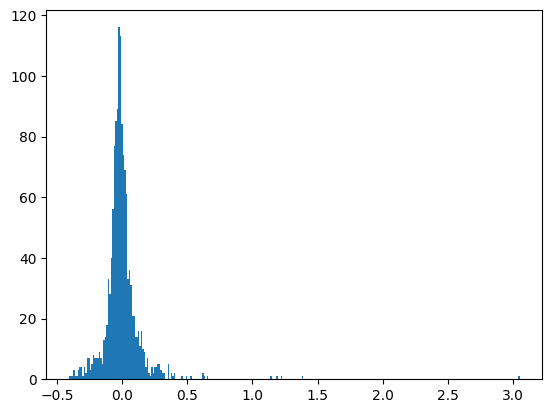

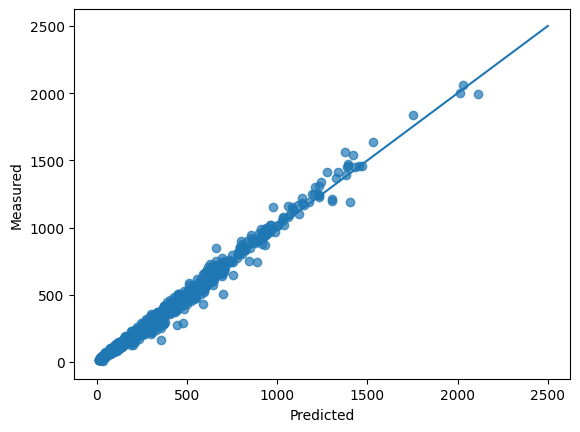

In [18]:
# Use it to predict
#new_config = pd.DataFrame([{"Meta Power Power in Watts [Power in Watts]": 134.116,
#                            "Launch Year": 2021,
#                            "Total System Memory (GB)": 32,
#                            "Memory Speed   (Freq)": 4800,
#                            "Core Type 1 # of Cores": 6,
#                            "Core Type 1 TDP/Base Frequency (Ghz)": 3.4}])

#prediction = model.predict(new_config)
prediction = model.predict(X_test)
#print("Predicted performance:", prediction)

# Compare predictions vs. actual in the test data
cmp_df = X_test.copy()
cmp_df['Predicted'] = prediction
cmp_df['Measured'] = y_test
cmp_df['Delta'] = cmp_df['Predicted'] - cmp_df['Measured']
cmp_df['Pct Delta'] = cmp_df['Delta'] / cmp_df['Measured']

# Plot residuals
plt.hist(cmp_df['Pct Delta'], bins=300)
plt.show()

# Plot predicted vs. Actual
import matplotlib.pyplot as plt
plt.scatter(cmp_df['Predicted'], cmp_df['Measured'], alpha=0.7)
plt.plot([0,2500], [0,2500])
plt.xlabel("Predicted")
plt.ylabel("Measured")
plt.show()

In [19]:
model.save('speccpu17mt_tf_model.keras')
model.save_weights('speccpu17mt_tf_model_weights.ckpt.weights.h5')